# **Определение выгодного тарифа для телеком компании**

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-пользовательских-данных" data-toc-modified-id="Подготовка-пользовательских-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка пользовательских данных</a></span></li><li><span><a href="#Анализ-и-описание-данных" data-toc-modified-id="Анализ-и-описание-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ и описание данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>



**Задача исследования**

На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа.

**Цели исследования** 
1. проанализировать поведение клиентов
2. проверить гипотезы:
  - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
  - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. Проверим данные на наличие пропусков, дубликатов, артефактов, оценим их влияние на исследование и проведем предобработку данных.

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

Опишем поведение клиентов оператора, исходя из выборки. Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Таким образом, исследование пройдёт в пять этапов:
1. Обзор данных.
2. Предобработка данных.
3. Подготовка пользовательских данных.
4. Анализ и описание данных.
5. Проверка гипотез



## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

pd.set_option('display.float_format', '{:,.2f}'.format)

> **Информация о пользователях**



In [2]:
df_users = pd.read_csv('/datasets/users.csv')


In [3]:
def info (df):           # функция для получения первичной информации о датасете
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.float_format', '{:,.2f}'.format)
    display(df.head(5))
    print(f'В таблице строк: {df.shape[0]}, столбцов: {df.shape[1]} ')
    print('Количество дубликатов:', df.duplicated().sum())
    print('Процент дубликатов: ', "{:.2%}".format((df.duplicated().sum()/df.shape[0])))
    tbl = pd.concat([df.dtypes, df.isna().sum(), round((df.isna().mean()*100),2), ], axis=1, 
                   keys=["Тип данных", "Кол-во пропусков", "% пропусков", ])
    display(tbl)

info(df_users)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице строк: 500, столбцов: 8 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
user_id,int64,0,0.00
age,int64,0,0.00
churn_date,object,462,92.40
city,object,0,0.00
first_name,object,0,0.00
last_name,object,0,0.00
reg_date,object,0,0.00
tariff,object,0,0.00


Таблица users (информация о пользователях):
   - user_id — уникальный идентификатор пользователя
   - first_name — имя пользователя
   - last_name — фамилия пользователя
   - age — возраст пользователя (годы)
   - reg_date — дата подключения тарифа (день, месяц, год)
   - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
   - city — город проживания пользователя
   - tarif — название тарифного плана

Посмотрим, сколько пользователей приходится на каждый тариф.

In [4]:
df_users.groupby('tariff')[['user_id']].count()

,user_id
tariff,
smart,351
ultra,149


Пользователей тарифа smart в выборке больше в 2.4 раза. 

> **Информация о звонках**

In [5]:
df_calls = pd.read_csv('/datasets/calls.csv')

In [6]:
info(df_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице строк: 202607, столбцов: 4 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
id,object,0,0.00
call_date,object,0,0.00
duration,float64,0,0.00
user_id,int64,0,0.00


Таблица calls (информация о звонках):
   - id — уникальный номер звонка
   - call_date — дата звонка
   - duration — длительность звонка в минутах
   - user_id — идентификатор пользователя, сделавшего звонок

> **Информация о сообщениях**

In [7]:
df_messages = pd.read_csv('/datasets/messages.csv')

In [8]:
info(df_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице строк: 123036, столбцов: 3 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
id,object,0,0.00
message_date,object,0,0.00
user_id,int64,0,0.00


Таблица messages (информация о сообщениях):
   - id — уникальный номер сообщения
   - message_date — дата сообщения
   - user_id — идентификатор пользователя, отправившего сообщение

> **Информация об интернет-сессиях**

In [9]:
df_internet = pd.read_csv('/datasets/internet.csv')

In [10]:
info(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице строк: 149396, столбцов: 5 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
Unnamed: 0,int64,0,0.00
id,object,0,0.00
mb_used,float64,0,0.00
session_date,object,0,0.00
user_id,int64,0,0.00


Таблица internet (информация об интернет-сессиях):
   - id — уникальный номер сессии
   - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
   - session_date — дата интернет-сессии
   - user_id — идентификатор пользователя

> **Информация о тарифах**

In [11]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [12]:
info(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В таблице строк: 2, столбцов: 8 
Количество дубликатов: 0
Процент дубликатов:  0.00%


,Тип данных,Кол-во пропусков,% пропусков
messages_included,int64,0,0.00
mb_per_month_included,int64,0,0.00
minutes_included,int64,0,0.00
rub_monthly_fee,int64,0,0.00
rub_per_gb,int64,0,0.00
rub_per_message,int64,0,0.00
rub_per_minute,int64,0,0.00
tariff_name,object,0,0.00


Таблица tariffs (информация о тарифах):
   - tariff_name — название тарифа
   - rub_monthly_fee — ежемесячная абонентская плата в рублях
   - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
   - messages_included — количество сообщений в месяц, включённых в абонентскую плату
   - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
   - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
   - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
   - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Описание тарифов**

Тариф «Смарт»
 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
 1. Ежемесячная плата: 1950 рублей
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.


**Вывод**

Мы имеем 4 датасета с данными пользователей за 2018 год и 1 датасет с информацией о тарифе. Всего в выборке участвует 500 пользователей с уникальными id. Несмотря на то, что количество пользователей тарифа ultra всего 149 человек, можно считать, что данных достаточно для анализа. 

Дубликатов в таблицах не обнаружено. 

Пропущенные значение обнаружены только в датасете `df_users`. Для 38 человек (7,6%) из 500 есть информация, когда они перестали пользоваться тарифом. Для остальных пользователей в этой колонке находятся пропуски, следовательно они продолжают пользоваться тарифом. 

Видим в колонках с датами типы данных object, его надо будет исправить.

## Предобработка данных

При изучении общей информации обнаружена лишня колонка `Unnamed: 0` в датасете `df_internet`. Она дублирует индексы таблицы. Удалим эту колонку. 

In [13]:
df_internet.drop(columns='Unnamed: 0', axis=1, inplace=True)
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Приведем данные к нужным типам. Исправим формат даты в таблицах. Нам нужно будет выделить номера месяцев, поэтому нужно работать с форматом datetime.  

Датасет `df_users` пока оставим без изменений, т.к. нам понадобятся лишь колонки с id, городом и тарифом.

Обработаем датасет `df_internet`. Изменим формат даты, добавим месяц.

In [14]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,"1,052.81",2018-09-07,1000,9
2,1000_2,"1,197.26",2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Обработаем датасет `df_messages`. Изменим формат даты, добавим месяц.

In [15]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Обработаем датасет `df_calls`. Изменим формат даты, добавим месяц.

In [16]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Округлим время звонков до минут в большую сторону, согласно условиям оператора. 

In [17]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


**Вывод**

В ходе предобработки мы избавились от дублирующего столбца, заменили тип данных object на datetime, где это необходимо. Также мы добавили значение месяца в таблицы df_calls, df_messages и df_internet для последующего объединения и группировки данных по этим столбцам. Данные готовы для дальнейшего анализа.

## Подготовка пользовательских данных 

> **Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.**

Сгруппируем данные по пользователю и месяцам и добавим расчеты в отдельные колонки.

In [18]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
df_calls_pivot.columns = ['user_id', 'month', 'total_calls', 'calls_duration']
df_calls_pivot.head()

,user_id,month,total_calls,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


>  **Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.**

In [19]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_pivot.columns = ['user_id', 'month', 'total_messages']
df_messages_pivot.head()

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


> **Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.**

In [20]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_pivot.columns = ['user_id', 'month', 'gb_used']
df_internet_pivot.head()

,user_id,month,gb_used
0,1000,5,"2,253.49"
1,1000,6,"23,233.77"
2,1000,7,"14,003.64"
3,1000,8,"14,055.93"
4,1000,9,"14,568.91"


Округлим значения mb до gb, согласно условиям оператора.

In [21]:
df_internet_pivot['gb_used'] = np.ceil(df_internet_pivot['gb_used'] / 1024).astype(int)
df_internet_pivot.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


> **Посчитаем помесячную выручку с каждого пользователя**

Для начала объединим таблицы со звонками, сообщениями и интернет трафиком.

In [22]:
grouped_data = df_calls_pivot.merge(df_messages_pivot, on=['user_id', 'month'], how='outer').sort_values(by='user_id')
grouped_data.head(10)

,user_id,month,total_calls,calls_duration,total_messages
0,1000,5,22.00,159.00,22.00
1,1000,6,43.00,172.00,60.00
2,1000,7,47.00,340.00,75.00
3,1000,8,52.00,408.00,81.00
4,1000,9,58.00,466.00,57.00
5,1000,10,57.00,350.00,73.00
6,1000,11,43.00,338.00,58.00
7,1000,12,46.00,333.00,70.00
9,1001,12,63.00,414.00,NaN
8,1001,11,59.00,430.00,NaN


In [23]:
grouped_data = grouped_data.merge(df_internet_pivot, on=['user_id', 'month'], how='outer').sort_values(by='user_id')
grouped_data.head(10)

,user_id,month,total_calls,calls_duration,total_messages,gb_used
0,1000,5,22.00,159.00,22.00,3.00
1,1000,6,43.00,172.00,60.00,23.00
2,1000,7,47.00,340.00,75.00,14.00
3,1000,8,52.00,408.00,81.00,14.00
4,1000,9,58.00,466.00,57.00,15.00
5,1000,10,57.00,350.00,73.00,15.00
6,1000,11,43.00,338.00,58.00,15.00
7,1000,12,46.00,333.00,70.00,10.00
8,1001,12,63.00,414.00,NaN,14.00
9,1001,11,59.00,430.00,NaN,18.00


Объединим таблицу с данными о пользователях. Добавим тарифные планы и город для каждого абонента.

In [24]:
grouped_data = grouped_data.merge(df_users[['user_id', 'city', 'tariff']], on='user_id').sort_values(by='user_id')
grouped_data.head()

,user_id,month,total_calls,calls_duration,total_messages,gb_used,city,tariff
0,1000,5,22.00,159.00,22.00,3.00,Краснодар,ultra
1,1000,6,43.00,172.00,60.00,23.00,Краснодар,ultra
2,1000,7,47.00,340.00,75.00,14.00,Краснодар,ultra
3,1000,8,52.00,408.00,81.00,14.00,Краснодар,ultra
4,1000,9,58.00,466.00,57.00,15.00,Краснодар,ultra


Рассчитаем выручку по каждому пользователю за месяц. 

Напишем функцию для расчета и применим ко всему датасету `grouped_data`. Результат запишем в колонку `revenue`.

In [25]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
mb_per_month_included = df_tariffs.loc[0, 'mb_per_month_included'] / 1024
mb_per_month_included

15.0

In [27]:
def revenue(row):
    result = 0
    
    if row['tariff'] == 'smart':
        result = df_tariffs.loc[0, 'rub_monthly_fee']
        minutes_included = df_tariffs.loc[0, 'minutes_included']
        rub_per_minute = df_tariffs.loc[0, 'rub_per_minute']
        messages_included = df_tariffs.loc[0, 'messages_included']
        rub_per_message = df_tariffs.loc[0, 'rub_per_message']
        mb_per_month_included = df_tariffs.loc[0, 'mb_per_month_included'] / 1024
        rub_per_gb = df_tariffs.loc[0, 'rub_per_gb']
                
        if row['calls_duration'] > minutes_included:
            calc = (row['calls_duration'] - minutes_included) * rub_per_minute
            result += calc
        if row['total_messages'] > messages_included:
            calc = (row['total_messages'] - messages_included) * rub_per_message
            result += calc
        if row['gb_used'] > mb_per_month_included:
            calc = (row['gb_used'] - mb_per_month_included) * rub_per_gb
            result += calc
            
    if row['tariff'] == 'ultra':
        result = df_tariffs.loc[1, 'rub_monthly_fee']
        minutes_included = df_tariffs.loc[1, 'minutes_included']
        rub_per_minute = df_tariffs.loc[1, 'rub_per_minute']
        messages_included = df_tariffs.loc[1, 'messages_included']
        rub_per_message = df_tariffs.loc[1, 'rub_per_message']
        mb_per_month_included = df_tariffs.loc[1, 'mb_per_month_included'] / 1024
        rub_per_gb = df_tariffs.loc[1, 'rub_per_gb']       
        
        if row['calls_duration'] > minutes_included:
            calc = (row['calls_duration'] - minutes_included) * rub_per_minute
            result += calc
        if row['total_messages'] > messages_included:
            calc = (row['total_messages'] - messages_included) * rub_per_message
            result += calc
        if row['gb_used'] > mb_per_month_included:
            calc = (row['gb_used'] - mb_per_month_included) * rub_per_gb
            result += calc
    
    return result


In [28]:
grouped_data['revenue'] = grouped_data.apply(revenue, axis=1)
grouped_data.head(10)

,user_id,month,total_calls,calls_duration,total_messages,gb_used,city,tariff,revenue
0,1000,5,22.00,159.00,22.00,3.00,Краснодар,ultra,"1,950.00"
1,1000,6,43.00,172.00,60.00,23.00,Краснодар,ultra,"1,950.00"
2,1000,7,47.00,340.00,75.00,14.00,Краснодар,ultra,"1,950.00"
3,1000,8,52.00,408.00,81.00,14.00,Краснодар,ultra,"1,950.00"
4,1000,9,58.00,466.00,57.00,15.00,Краснодар,ultra,"1,950.00"
5,1000,10,57.00,350.00,73.00,15.00,Краснодар,ultra,"1,950.00"
6,1000,11,43.00,338.00,58.00,15.00,Краснодар,ultra,"1,950.00"
7,1000,12,46.00,333.00,70.00,10.00,Краснодар,ultra,"1,950.00"
8,1001,12,63.00,414.00,NaN,14.00,Москва,smart,550.00
9,1001,11,59.00,430.00,NaN,18.00,Москва,smart,"1,150.00"


**Вывод**

Мы провели подготовку данных для анализа таким образом, чтобы получилась одна общая таблица, содержащая все необходимые данные и расчеты для дальнейшего анализа поведения пользователей двух тарифных планов. 

В ходе подготовки мы нашли общее количество звонков пользователей за месяцы пользования тарифом, а также количество сообщений и объем трафика. Найденная выручка по каждому пользователю за месяц поможет определить наиболее прибыльный тариф.

## Анализ и описание данных

Опишем поведение клиентов оператора, исходя из выборки. 

Определим, сколько **в среднем** минут, сообщений и гигабайт требуется пользователям каждого тарифа в месяц. 

In [29]:
grouped_data.groupby('tariff')[['calls_duration', 'total_messages', 'gb_used', 'revenue']].mean()

,calls_duration,total_messages,gb_used,revenue
tariff,,,,
smart,419.06,38.72,16.34,"1,289.97"
ultra,545.45,61.16,19.69,"2,070.15"


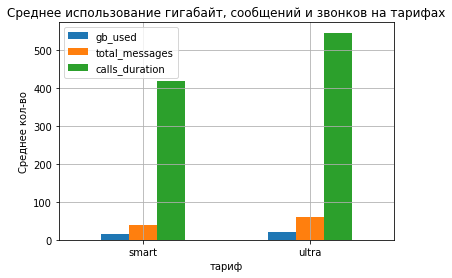

In [30]:
grouped_data.groupby('tariff')[['gb_used', 'total_messages', 'calls_duration']].mean().plot(kind='bar', grid=True)
plt.xticks(rotation = 0)
plt.title('Среднее использование гигабайт, сообщений и звонков на тарифах')
plt.xlabel('тариф')
plt.ylabel('Среднее кол-во');

По сводной таблице и графику видно, что в среднем пользователям тарифа ultra используют больше минут, сообщений и трафика. 

Рассчитаем **дисперсию** для средних значений количества минут, сообщений и гигабайт для тарифа **smart**

In [31]:
variance_smart = np.var(grouped_data.query('tariff == "smart"')[['calls_duration', 'total_messages', 'gb_used']], ddof=1)
variance_smart

calls_duration   35,844.19
total_messages      717.59
gb_used              32.92
dtype: float64

Рассчитаем **стандартное отклонение** по дисперсии.

In [32]:
std_smart = np.sqrt(variance_smart)
std_smart

calls_duration   189.33
total_messages    26.79
gb_used            5.74
dtype: float64

Узнать среднее и стандартное отклонение можно и методом `describe`

In [33]:
grouped_data.query('tariff == "smart"').describe()

,user_id,month,total_calls,calls_duration,total_messages,gb_used,revenue
count,"2,229.00","2,229.00","2,223.00","2,223.00","1,922.00","2,228.00","2,229.00"
mean,"1,246.51",8.35,58.62,419.06,38.72,16.34,"1,289.97"
std,146.12,2.92,25.80,189.33,26.79,5.74,818.40
min,"1,001.00",1.00,1.00,0.00,1.00,0.00,550.00
25%,"1,121.00",6.00,40.00,285.00,17.00,13.00,550.00
50%,"1,239.00",9.00,60.00,423.00,34.00,17.00,"1,023.00"
75%,"1,376.00",11.00,76.00,545.50,55.00,20.00,"1,750.00"
max,"1,499.00",12.00,198.00,"1,435.00",143.00,38.00,"6,770.00"


Рассчитаем параметры **дисперсии** и **стандартного отклонения** для тарифа **ultra**.

In [34]:
variance_ultra = np.var(grouped_data.query('tariff == "ultra"')[['calls_duration', 'total_messages', 'gb_used']], ddof=1)
variance_ultra

calls_duration   94,203.42
total_messages    2,109.66
gb_used              94.15
dtype: float64

In [35]:
std_ultra = np.sqrt(variance_ultra)
std_ultra

calls_duration   306.93
total_messages    45.93
gb_used            9.70
dtype: float64

Отметим, что дисперсии и стандартные отклонения в выборке "Ультра" больше, чем в "Смарт". Можно сказать, что это зависит от размеров выборок. Чем меньше размер выборки, тем больше разброс значений.

Рассмотрим распеределение средних значений на гистограммах:

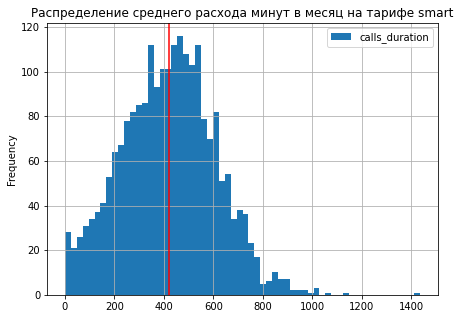

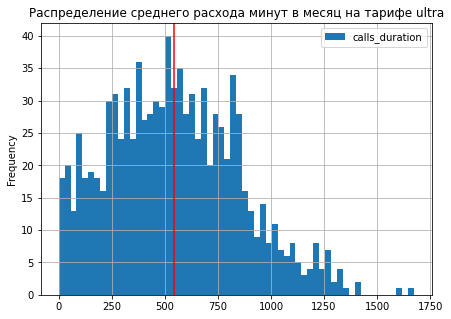

In [36]:
grouped_data.query('tariff == "smart"').plot(y='calls_duration', kind='hist', bins=60, figsize=(7, 5), grid=True)
plt.title('Распределение среднего расхода минут в месяц на тарифе smart')
plt.axvline(grouped_data.query('tariff == "smart"')['calls_duration'].mean(), color='red')

grouped_data.query('tariff == "ultra"').plot(y='calls_duration', kind='hist', bins=60, figsize=(7, 5), grid=True)
plt.title('Распределение среднего расхода минут в месяц на тарифе ultra')
plt.axvline(grouped_data.query('tariff == "ultra"')['calls_duration'].mean(), color='red')
plt.show()

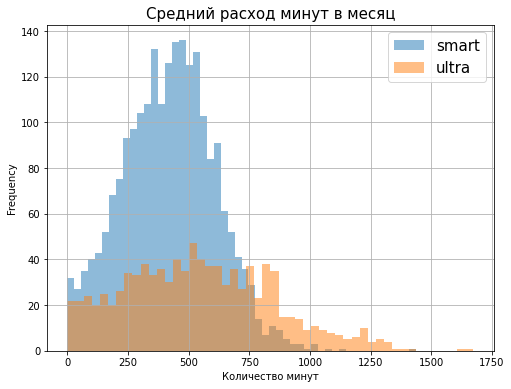

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in grouped_data.groupby('tariff'):
    df.plot(y='calls_duration', kind='hist', bins=50, grid=True, alpha=0.5, ax=ax, label=label)
    plt.legend(fontsize = 15)
    plt.title('Средний расход минут в месяц', fontsize = 15)
    plt.xlabel('Количество минут');

По графикам можно сказать, что пользователи тарифа "Ультра" никогда не превышают лимита в 3000 минут разговора, тогда как пользователям тарифа "Смарт" часто не хватает 500 минут, включенных в абонентскую плату и почти в половине наблюдений клиенты доплачивают за связь.

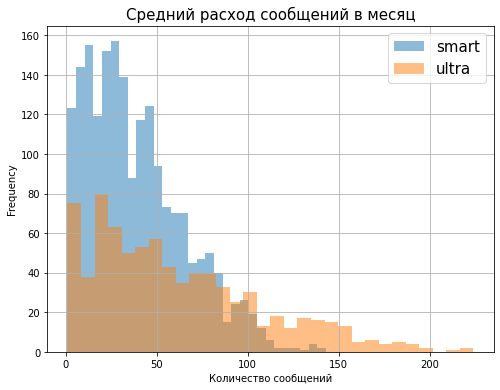

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in grouped_data.groupby('tariff'):
    df.plot(y='total_messages', kind='hist', bins=30, grid=True, alpha=0.5, ax=ax, label=label)
    plt.legend(fontsize = 15)
    plt.title('Средний расход сообщений в месяц', fontsize = 15)
    plt.xlabel('Количество сообщений');
    

На графике видим не симметричное распределение, с длинным хвостом справа. Это говорит о том, что большая часть пользователей использует небольшое количество сообщений в месяц.

Пользователи тарифа "Ультра" не выходят за рамки предоплаченного лимита в 1000 сообщений. В среднем им требуется гораздо меньше сообщений, около 60. Тогда как некоторая часть пользователей тарифа "Смарт" доплачивают за сообщения сверх лимита в 50 сообщений. 

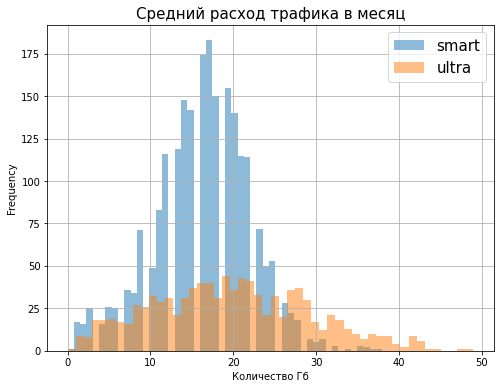

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in grouped_data.groupby('tariff'):
    df.plot(y='gb_used', kind='hist', bins=50, grid=True, alpha=0.5, ax=ax, label=label)
    plt.legend(fontsize = 15)
    plt.title('Средний расход трафика в месяц', fontsize = 15)
    plt.xlabel('Количество Гб');

Распределения использования трафика стремятся по форме к нормальному и распределены практически равномерно вокруг среднего. Провалы и пики можно объяснить дискретным характером данных и малым размером выборки.

Пользователи тарифа "Смарт" в среднем используют весь включенный в абонентскую плату лимит в 15ГБ и значительная часть выборки доплачивает за ГБ. Пользователи тарифа "Ультра" в большинстве случаев не превышают оплаченный лимит в 30 ГБ, и в среднем расходуют 20ГБ.

**Вывод**

Мы увидели, что около половины пользователей тарифа "Смарт" оплачивают звонки, сообщения и гигабайты сверх тарифного пакета. Пользователи тарифа "Ультра", напротив, не выходят за лимиты сообщения и минут, и только небольшая часть абонентов доплачивает за трафик.

## Проверка гипотез

>  **Cредняя выручка с пользователей тарифов «Ультра» и «Смарт» различаются**

- Н0: "Средняя помесячная выручка с пользователей тарифа "Ультра" и "Смарт" не отличается"
- Н1: "Средняя помесячная выручка с пользователей тарифа "Ультра" и "Смарт" отличается"

Рассмотрим обе выборки, чтобы определиться с параметрами теста.

In [40]:
smart = grouped_data.query('tariff == "smart"')[['revenue']]
smart

,revenue
8,550.00
9,"1,150.00"
16,950.00
15,550.00
14,"1,150.00"
...,...
3209,"2,386.00"
3212,"1,513.00"
3210,550.00
3211,"1,150.00"


In [41]:
ultra = grouped_data.query('tariff == "ultra"')[['revenue']]
ultra

,revenue
0,"1,950.00"
1,"1,950.00"
2,"1,950.00"
3,"1,950.00"
4,"1,950.00"
...,...
3190,"1,950.00"
3189,"2,400.00"
3186,"1,950.00"
3187,"3,300.00"


Выборки включают 2229 и 985 элементов. Достаточное количество, чтобы использовать t-тест. Размеры выборок не одинаковые, следовательно будут отличаться их дисперсии. Присвоим параметру `equal_var` значение `False`.

Критический уровень статистической значимости установим равный 5%. Если p-value окажется меньше него - отвергнем нулевую гипотезу.

In [42]:
alpha = 0.05 
result = st.ttest_ind(smart, ultra, equal_var=False)
print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  [4.26063139e-250]
Отвергаем нулевую гипотезу


**Вывод**

Проверка показала наличие зависимости доходности от типа тарифа. Значение p-value значительно меньше порогового. Можно сделать вывод о довольно значимом различии средних значений выручки.

> **Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

- H0: "Средняя помесячная выручка с клиентов "Мегалайна" из Москвы не отличается от выручки с клиентов из других регионов". 
- H1: "Средняя помесячная выручка с клиентов "Мегалайна" из Москвы отличается от выручки с клиентов из других регионов".

Рассмотрим обе выборки, чтобы определиться с параметрами теста.

In [43]:
moscow = grouped_data.query('city == "Москва"')['revenue']
moscow

8        550.00
9      1,150.00
17     1,950.00
18     1,950.00
19     1,950.00
         ...   
3160     550.00
3156     550.00
3155   1,750.00
3154     750.00
3157   1,350.00
Name: revenue, Length: 611, dtype: float64

In [44]:
regions = grouped_data.query('city != "Москва"')['revenue']
regions

0      1,950.00
1      1,950.00
2      1,950.00
3      1,950.00
4      1,950.00
         ...   
3209   2,386.00
3212   1,513.00
3210     550.00
3211   1,150.00
3213     598.00
Name: revenue, Length: 2603, dtype: float64

Выборки включают 611 и 2603 элементов. Достаточное количество, чтобы иcпользовать t-тест. Размеры выборок сильно отличаются, следовательно будут отличаться их дисперсии. Присвоим параметру `equal_var` значение `False`.

Критический уровень статистической значимости установим равный 5%. Если p-value окажется меньше него - отвергнем нулевую гипотезу.

In [45]:
alpha = 0.05 
result = st.ttest_ind(moscow, regions, equal_var=False)
print('p-значение: ', result.pvalue)

if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие почти 52%. Это явно слишком большая вероятность, чтобы сделать вывод о значимом различии между средними выручками.  Можно предположить, что доли пользователей тарифов "Смарт" и "Ультра" в Москве и других регионах примерно одинакова.

## Общий вывод

В ходе исследования мы изучили данные 500 клиентов мобильного оператора, определили цели и план исследования. На этапе предобработки мы  изменили типы данных и избавились от лишней колонки. На этапе подготовки мы сгруппировали данные и  добавили колонки с расчетами общих средних данных и выручки.  В результате дальнейшего анализа групп пользователей двух тарифов, мы определили как различаются их средние показатели количества минут разговора, сообщений и  объёма интернет-трафика. 

По данным выборки, средний счет пользователей тарифа “Ультра” (2070 руб.) в 1.6 раз выше, чем средний счет пользователей тарифа “Смарт” (1290 руб.), несмотря на то, что около половины пользователей “Смарт” доплачивают за дополнительные минуты, сообщения и трафик, сверх лимита. Пользователи “Ультра” доплачивают только за дополнительные ГБ и таких пользователей в выборке не много.

Также мы проверили две гипотезы и установили для генеральной совокупности  зависимость средней выручки от тарифа. Проверяя гипотезу об отличии выручки для жителей Москвы и регионов, мы,  напротив, не установили зависимости выручки от города. 

Можно сказать, что с точки зрения доходности, лучшим является тариф "Ультра", однако на этом тарифе пользователям предлагается предоплачивать слишком большие объемы звонков и сообщений. Средний расход сообщений на тарифу "Ультра" - 61, средний расход минут - 545, при лимите в 1000 сообщений и 3000 минут.
